# Spatial Alignment

Integrative analysis of spatially resolved transcriptomics datasets empowers a deeper understanding of complex biological systems. However, integrating multiple tissue sections presents challenges for batch effect removal, particularly when the sections are measured by various technologies or collected at different times. Here, we propose **Spatial Alignment**, an unsupervised contrastive learning model that employs the expression of all measured genes and the spatial location of cells, to integrate multiple tissue sections. It enables the joint downstream analysis of multiple datasets not only in low-dimensional embeddings but also in the reconstructed full expression space. In benchmarking analysis, spatiAlign outperforms state-of-the-art methods in learning joint and discriminative representations for tissue sections, each potentially characterized by complex batch effects or distinct biological characteristics

After alignment, we will get a new expression matrix and a reduced dimensional matrix, we can use them to do others analysis such as Neighbors, UMAP, Cluster,  etc.

<div class="alert alert-info">

**Preparation**

In order to use this function, you need to install **stereopy** with some necessary dependencies:

> &ensp;&ensp; **cpu: &ensp;&ensp; pip install stereopy[spatialign]**  
> &ensp;&ensp; **cuda11: &ensp;&ensp; pip install stereopy[spatialign-cu11]**  
> &ensp;&ensp; **cuda12: &ensp;&ensp; pip install stereopy[spatialign-cu12]**  

</div>

## Reading data

In [1]:
import stereo as st
from stereo.core.ms_pipeline import slice_generator
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = st.io.read_h5ad('../../data/BatchEval_spatiAlign_stereoAlign_demo_datasets/stereo_olfactory_bulb_ann.h5ad')
data2 = st.io.read_h5ad('../../data/BatchEval_spatiAlign_stereoAlign_demo_datasets/visium_olfactory_bulb_ann.h5ad')

ms_data = data1 + data2
ms_data

ms_data: {'0': (1123, 27825), '1': (1184, 32285)}
num_slice: 2
names: ['0', '1']
merged_data: None
obs: []
var: []
relationship: other
var_type: intersect to 0
current_mode: integrate
current_scope: scope_[0,1]
scopes_data: []
mss: []

## Merging Data

If there are no z-coordinate in the input data, you can specify the distance between each sample by parameter `space_between` to calculate the z-coordinate.

In [3]:
ms_data.integrate(space_between='1um')
ms_data.merged_data

AnnBasedStereoExpData object with n_cells X n_genes = 2307 X 26760
adata: id(140717206027232)
bin_type: bins
bin_size: 1
offset_x = None
offset_y = None
cells: ['cell_name', 'batch']
genes: ['gene_name']
cells_matrix = ['spatial']
Layers with keys: 
tl.result: []

In [4]:
ms_data.tl.set_scope_and_mode(scope=slice_generator[:], mode='integrate')

## Preprocessing

In [5]:
ms_data.tl.cal_qc()
ms_data.tl.raw_checkpoint()

[2025-02-20 17:32:01][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run cal_qc
[2025-02-20 17:32:01][Stereo][3375092][MainThread][140719273752384][st_pipeline][41][INFO]: start to run cal_qc...
[2025-02-20 17:32:01][Stereo][3375092][MainThread][140719273752384][st_pipeline][44][INFO]: cal_qc end, consume time 0.1102s.
[2025-02-20 17:32:01][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run raw_checkpoint


[2025-02-20 17:32:01][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run spatial_scatter


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

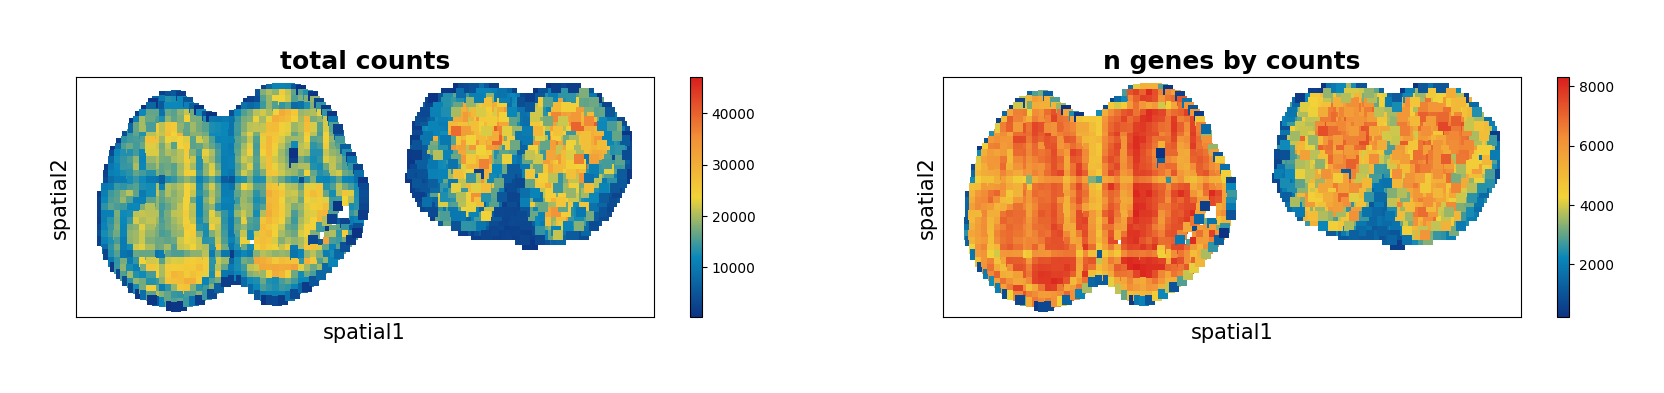

In [6]:
ms_data.plt.spatial_scatter(show_plotting_scale=False, reorganize_coordinate=3, horizontal_offset_additional=1000)

In [7]:
# ms_data.tl.filter_cells(min_genes=20)
# ms_data.tl.filter_genes(min_cells=20)
ms_data.tl.normalize_total()
ms_data.tl.log1p()
# ms_data.tl.scale(zero_center=False)

[2025-02-20 17:32:02][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run normalize_total
[2025-02-20 17:32:02][Stereo][3375092][MainThread][140719273752384][st_pipeline][41][INFO]: start to run normalize_total...
[2025-02-20 17:32:02][Stereo][3375092][MainThread][140719273752384][st_pipeline][44][INFO]: normalize_total end, consume time 0.0656s.
[2025-02-20 17:32:02][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run log1p
[2025-02-20 17:32:02][Stereo][3375092][MainThread][140719273752384][st_pipeline][41][INFO]: start to run log1p...
[2025-02-20 17:32:02][Stereo][3375092][MainThread][140719273752384][st_pipeline][44][INFO]: log1p end, consume time 0.4918s.


## UMAP without alignment

We can use UMAP to inspect the effect of Spatial Alignment Integration.

In [8]:
ms_data.tl.pca(use_highly_genes=False, n_pcs=50, res_key='pca')
ms_data.tl.neighbors(pca_res_key='pca', res_key='neighbors')
ms_data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')

[2025-02-20 17:32:02][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run pca
[2025-02-20 17:32:02][Stereo][3375092][MainThread][140719273752384][st_pipeline][41][INFO]: start to run pca...
[2025-02-20 17:32:02][Stereo][3375092][MainThread][140719273752384][dim_reduce][78][WARNING]: svd_solver: auto can not be used with sparse input.
Use "arpack" (the default) instead.
[2025-02-20 17:32:29][Stereo][3375092][MainThread][140719273752384][dim_reduce][99][INFO]: x_pca dType is changed from float64 to float32
[2025-02-20 17:32:29][Stereo][3375092][MainThread][140719273752384][st_pipeline][44][INFO]: pca end, consume time 26.7350s.
[2025-02-20 17:32:29][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run neighbors
[2025-02-20 17:32:29][Stereo][3375092][MainThread][140719273752384][st_pipeline][41][INFO]: start to run neighbors...
2025-02-20 17:32:32.533106: I tensorflow/tsl/c

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


[2025-02-20 17:32:38][Stereo][3375092][MainThread][140719273752384][st_pipeline][44][INFO]: umap end, consume time 2.4514s.


In [9]:
ms_data.plt.batches_umap(res_key='umap')

[2025-02-20 17:32:38][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run batches_umap


Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Bokeh(Figure)
        [1] Column
            [0] Row
                [0] Bokeh(Figure)
                [1] Bokeh(Figure)

We can see, the distribution of these two batches of data on UMAP space is so different, they are separated from each other obviously.

## Spatial Alignment

This function will ouput a corrected full expression matrix and a reduced dimensional matrix.

By default, the corrected full expression matrix is saved in `data.layers`, if the parameter `inplace` is set to True, the original expression matrix will be replaced.

The reduced dimensional matrix is stored by key **'aligned_reduction'**, you can specify the dimensions to reduction by parameter `latent_dims`.

More details about other parameters in [API](../content/stereo.algorithm.spatial_alignment.SpatialAlignment.main.html).

**Spatial Alignment** can be run with the data only containing highly variable genes, this usually can lead to better performance, in this case, the data will be filtered to only contain highly variable genes after running **Spatial Alignment**.

In [10]:
# ms_data.tl.highly_variable_genes(
#     min_mean=0.0125,
#     max_mean=3,
#     min_disp=0.5,
#     n_top_genes=2000,
#     res_key='highly_variable_genes'
# )

Here we run **Spatial Alignment** with entire data, if you want to only use highly variable genes, you need to uncomment the codes in the notebook cell above to run `ms_data.tl.highly_variable_genes` beforehand and set the parameter `use_hvg` to True.

In [11]:
ms_data.tl.spatial_alignment(
    use_hvg=False,
    n_neighors=15,
    is_undirected=True,
    latent_dims=100,
    tau1=0.05,
    tau2=0.01,
    tau3=0.1,
    inplace=False,
    is_verbose=False
)

[2025-02-20 17:32:40][Stereo][3375092][MainThread][140719273752384][ms_pipeline][115][INFO]: register algorithm spatial_alignment to <class 'stereo.core.stereo_exp_data.AnnBasedStereoExpData'>-140717210444080
[2025-02-20 17:32:40][Stereo][3375092][MainThread][140719273752384][dataset][144][INFO]: The spatial coordinates specified by spatial are used to calculate nearest neighbor graphs


2025-02-20 17:32:40 Method: 'init_bank' Running...
  Running time: 0.0 min 1.4996 s
2025-02-20 17:32:42 Method: 'train' Running...
  2025-02-20 17:45:02 Epoch: 139 Loss: 7.0915 Loss min: 7.0402 EarlyStopping counter: 15 out of 15
  2025-02-20 17:45:02 Model Training Finished!
  Running time: 12.0 min 20.3509 s
2025-02-20 17:45:02 Method: 'alignment' Running...
2025-02-20 17:45:05 Batch Alignment Finished!
  Running time: 0.0 min 3.1240 s


In [12]:
ms_data.tl.result['aligned_reduction']

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.009977,-0.091885,-0.106940,0.145098,0.089974,-0.008399,0.162432,-0.314220,0.239323,-0.151989,...,-0.256612,0.202301,-0.169625,0.070727,0.058331,-0.072663,-0.213056,0.276813,-0.194957,-0.036370
1,-0.076175,-0.239181,-0.171321,0.228486,0.024512,0.017261,0.080949,-0.253091,0.123381,0.017464,...,-0.285186,0.214535,-0.196208,0.082946,0.063450,0.009587,-0.216828,0.179361,-0.280448,-0.104205
2,-0.036215,-0.233678,-0.163343,0.184396,0.114535,0.101297,0.147587,-0.299150,0.153697,-0.072609,...,-0.296751,0.125169,-0.182926,0.224416,0.107030,-0.019341,-0.276176,0.260968,-0.242852,-0.041470
3,-0.062999,-0.305679,-0.179629,0.098737,0.140392,0.254699,0.062434,-0.322186,0.101131,-0.168877,...,-0.189232,-0.007272,-0.269327,0.233675,0.138923,0.048628,-0.311299,0.243654,-0.276228,0.054752
4,0.081919,-0.314154,-0.131669,0.022888,0.037666,0.142007,-0.056440,-0.323457,0.072555,-0.095923,...,-0.221495,0.058406,-0.209400,0.087003,0.099748,0.104273,-0.297579,0.188548,-0.273973,0.052728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,0.356144,0.078517,0.435474,-0.211080,-0.091554,-0.124335,-0.088007,0.018068,-0.367442,0.370240,...,-0.355697,-0.023487,0.274631,0.198752,-0.272967,-0.418953,-0.037732,-0.202396,0.363269,-0.308682
2303,-0.006577,-0.225398,0.104167,0.171594,-0.265057,0.188282,-0.131274,0.209731,-0.066610,0.026982,...,-0.115878,0.106854,0.299534,0.020559,-0.024644,-0.157923,0.020815,-0.281706,-0.018450,0.064131
2304,0.235737,0.388830,-0.197873,-0.283984,-0.063494,0.065340,-0.130950,-0.278878,0.273952,-0.049268,...,0.479300,-0.318692,0.026394,-0.242704,0.492687,0.289297,-0.069553,0.286800,0.156109,0.370372
2305,0.030273,0.065268,-0.096198,-0.190912,-0.169639,0.747086,-0.136572,-0.264383,0.152184,-0.228118,...,0.198014,-0.131973,0.067535,-0.281841,0.290346,-0.156325,0.006843,0.300321,-0.121258,-0.078710


## UMAP based on aligned data

Here you need to set the `pca_res_key` to **'aligned_reduction'**.

In [13]:
ms_data.tl.neighbors(pca_res_key='aligned_reduction', res_key='neighbors_aligned', n_jobs=-1)
ms_data.tl.umap(pca_res_key='aligned_reduction', neighbors_res_key='neighbors_aligned', res_key='umap_aligned')

[2025-02-20 17:45:05][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run neighbors
[2025-02-20 17:45:05][Stereo][3375092][MainThread][140719273752384][st_pipeline][41][INFO]: start to run neighbors...
[2025-02-20 17:45:06][Stereo][3375092][MainThread][140719273752384][st_pipeline][44][INFO]: neighbors end, consume time 0.2505s.
[2025-02-20 17:45:06][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run umap
[2025-02-20 17:45:06][Stereo][3375092][MainThread][140719273752384][st_pipeline][41][INFO]: start to run umap...


	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs


[2025-02-20 17:45:09][Stereo][3375092][MainThread][140719273752384][st_pipeline][44][INFO]: umap end, consume time 3.0552s.


	completed  450  /  500 epochs


In [14]:
ms_data.plt.batches_umap(res_key='umap_aligned')

[2025-02-20 17:45:09][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run batches_umap


Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Bokeh(Figure)
        [1] Column
            [0] Row
                [0] Bokeh(Figure)
                [1] Bokeh(Figure)

The distribution on UMAP space which is created based on aligned data is almost overlap.

## Cluster based on aligned data

In [15]:
ms_data.tl.leiden(neighbors_res_key='neighbors_aligned', res_key='leiden')

[2025-02-20 17:45:09][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run leiden
[2025-02-20 17:45:09][Stereo][3375092][MainThread][140719273752384][st_pipeline][41][INFO]: start to run leiden...
[2025-02-20 17:45:09][Stereo][3375092][MainThread][140719273752384][st_pipeline][44][INFO]: leiden end, consume time 0.4079s.


[2025-02-20 17:45:09][Stereo][3375092][MainThread][140719273752384][ms_pipeline][125][INFO]: data_obj(idx=0) in ms_data start to run cluster_scatter


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

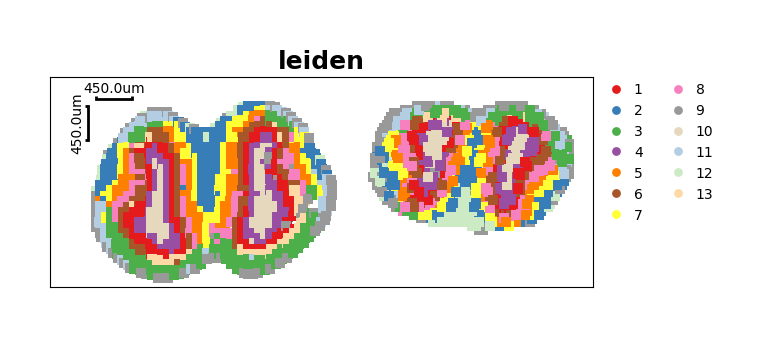

In [16]:
ms_data.plt.cluster_scatter(
    res_key='leiden',
    show_plotting_scale=True,
    reorganize_coordinate=3,
    horizontal_offset_additional=1000
)